<a href="https://colab.research.google.com/github/GoodNightIsabel/Replication/blob/main/RQ3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#loading the libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import seaborn as sns
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV

In [15]:
pwd

'/content'

In [10]:
#loading the data
Data1 = pd.read_csv('IST_MIR.csv')
Data2 = pd.read_csv('IST_OST.csv')
Data3 = pd.read_csv('IST_WIK.csv')

In [27]:
# Define the list of columns to exclude
columns_to_exclude = ['org', 'file_']

# Read the CSV file while excluding the specified colum
Data1 = pd.read_csv('IST_MIR.csv', usecols=lambda column: column not in columns_to_exclude)

In [28]:
Data1

,URL,File,Lines_of_code,Require,Ensure,Include,Attribute,Hard_coded_string,Comment,Command,File_mode,SSH_KEY,defect_status
0,0,0,125,0,0,0,27,16,32,0,0,0,0
1,1,1,35,0,1,1,6,10,11,1,1,1,1
2,0,2,53,0,3,5,19,15,0,2,1,1,1
3,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0,2,278,6,4,11,54,30,96,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,37,0,1,1,16,13,4,0,0,0,0
176,0,0,11,0,0,0,0,0,4,0,0,0,0
177,0,1,33,1,0,1,6,4,9,0,1,1,0
178,0,1,84,8,9,19,32,12,15,0,1,1,0


In [30]:
# Define the list of columns to exclude
columns_to_exclude = ['org', 'file_']

# Read the CSV file while excluding the specified colum
Data2 = pd.read_csv('IST_OST.csv', usecols=lambda column: column not in columns_to_exclude)
Data2

,URL,File,Lines_of_code,Require,Ensure,Include,Attribute,Hard_coded_string,Comment,Command,File_mode,SSH_KEY,defect_status
0,4,0,280,0,0,0,35,5,192,0,0,0,1
1,4,0,277,0,0,0,35,7,187,0,0,0,1
2,4,0,263,0,0,0,35,5,186,0,0,0,1
3,4,0,263,0,0,0,35,5,186,0,0,0,1
4,4,0,263,0,0,0,35,5,186,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,2,9,239,14,8,26,96,64,25,3,7,7,1
1379,3,3,508,10,14,30,138,111,0,3,3,3,1
1380,2,3,421,20,13,34,157,111,17,1,3,3,1
1381,1,15,322,10,30,43,144,94,15,5,2,2,1


In [31]:
# Define the list of columns to exclude
columns_to_exclude = ['org', 'file_']

# Read the CSV file while excluding the specified colum
Data3 = pd.read_csv('IST_WIK.csv', usecols=lambda column: column not in columns_to_exclude)
Data3

,URL,File,Require,Ensure,Include,Attribute,Hard_coded_string,Command,File_mode,SSH_KEY,Lines_of_code,Comment,defect_status
0,1,11,1,5,7,32,21,0,1,1,340,126,1
1,0,0,0,0,0,0,18,0,0,0,80,3,1
2,1,0,3,2,5,12,7,0,1,1,38,6,0
3,1,0,0,0,0,18,69,0,0,0,171,21,0
4,1,0,0,0,0,18,235,0,0,0,378,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0,0,0,0,1,4,1,1,0,0,33,20,1
292,0,1,2,3,5,14,9,0,0,0,53,23,0
293,0,5,3,7,14,39,10,0,2,2,90,14,1
294,1,5,2,7,9,32,45,0,1,1,261,108,1


In [36]:
 #log transformation on the extracted counts for each source code property
log_transformed_Data1 = np.log1p(Data1)
log_transformed_Data2 = np.log1p(Data2)
log_transformed_Data3 = np.log1p(Data3)

In [50]:
# Creating the PCA
pca = PCA(n_components=3)
# Fit the PCA model to your data
pca.fit(log_transformed_Data1)
# Accessing the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.68742617 0.11321712 0.0691574 ]


In [51]:
# Transform data into the principal component space
pca_data = pca.transform(log_transformed_Data1)

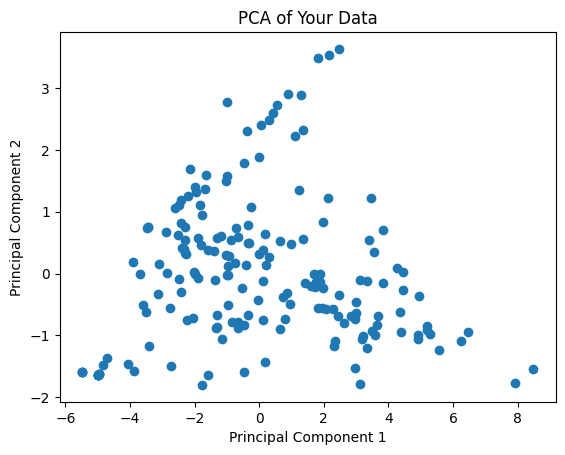

In [52]:
#vizualization of the data
# Scatter plot of the first two principal components
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Your Data")
plt.show()

Explained Variance Ratio: [0.52398395 0.23211899]


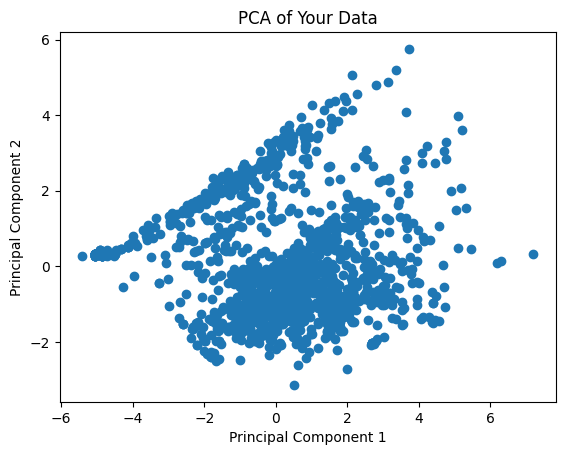

In [56]:
#PCA with Data2
# Creating the PCA
pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(log_transformed_Data2)

# Accessing the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Transform data into the principal component space
pca_data = pca.transform(log_transformed_Data2)

#vizualization of the data
# Scatter plot of the first two principal components
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Your Data")
plt.show()

Explained Variance Ratio: [0.62994059 0.11460757]


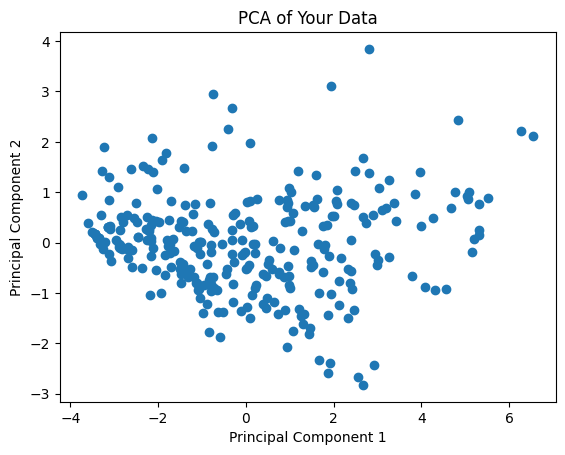

In [57]:
#PCA with Data3
# Creating the PCA
pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(log_transformed_Data3)

# Accessing the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Transform data into the principal component space
pca_data = pca.transform(log_transformed_Data3)

#vizualization of the data
# Scatter plot of the first two principal components
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Your Data")
plt.show()

 Classification and Regression Tree (CART): CART generates a tree based on the impurity measure, and uses that tree to provide de- cisions based on input features. We select CART because this learner does not make any assumption on the distribution of fea- tures, and is robust to model overfitting.

In [61]:
#Classification and Regression Tree(CART)
#Classification
X=Data1[['URL','File','Lines_of_code','Require','Ensure','Include','Attribute','Hard_coded_string','Comment','Command','File_mode','SSH_KEY']]
y=Data1[['defect_status']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

#Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a DecisionTreeRegressor
regressor = DecisionTreeRegressor()

# Fit the regressor on the training data
regressor.fit(X_train, y_train)

# Making predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the regressor using r2_score and mse
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Accuracy: 0.6296296296296297
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        26
           1       0.64      0.64      0.64        28

    accuracy                           0.63        54
   macro avg       0.63      0.63      0.63        54
weighted avg       0.63      0.63      0.63        54

Mean Squared Error: 0.37981859410430835
R-squared: -0.521361291769455


KNearestNeighbor(KNN):TheKNNclassificationtechniquestores all available prediction outcomes based on training data and classi- fies test data based on similarity measures. We select KNN because prior research has reported that defect prediction models that use KNN perform well

In [64]:
# Loading the classification dataset
X=Data2[['URL','File','Lines_of_code','Require','Ensure','Include','Attribute','Hard_coded_string','Comment','Command','File_mode','SSH_KEY']]
y=Data2[['defect_status']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNNClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.6289156626506024
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       163
           1       0.71      0.67      0.69       252

    accuracy                           0.63       415
   macro avg       0.62      0.62      0.62       415
weighted avg       0.64      0.63      0.63       415



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Logistic Regression (LR): LR estimates the probability that a data point belongs to a certain class, given the values of features. LR provides good performance for classification if the features are roughly linear. We select LR because this learner performs well for classification problems such as defect prediction and fault prediction.

In [65]:
# Loading the classification dataset
X=Data2[['URL','File','Lines_of_code','Require','Ensure','Include','Attribute','Hard_coded_string','Comment','Command','File_mode','SSH_KEY']]
y=Data2[['defect_status']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LogisticRegression model
clf = LogisticRegression()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.672289156626506
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.69      0.62       163
           1       0.77      0.66      0.71       252

    accuracy                           0.67       415
   macro avg       0.67      0.67      0.67       415
weighted avg       0.69      0.67      0.68       415



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



• Naive Bayes (NB): The NB classification technique computes the posterior probability of each class to make prediction decisions. We select NB because prior research has reported that defect prediction models that use NB perform well

In [66]:
#doing a Gaussian NB
# Loading the classification dataset
X=Data2[['URL','File','Lines_of_code','Require','Ensure','Include','Attribute','Hard_coded_string','Comment','Command','File_mode','SSH_KEY']]
y=Data2[['defect_status']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.6048192771084338
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.93      0.65       163
           1       0.90      0.39      0.55       252

    accuracy                           0.60       415
   macro avg       0.70      0.66      0.60       415
weighted avg       0.74      0.60      0.59       415



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest (RF): RF is an ensemble technique that creates mul- tiple classification trees, each of which are generated by taking ran- dom subsets of the training data. Unlike LR, RF does not ex- pect features to be linear for good classification performance. Re- searchers recommended the use of statistical learners that uses ensemble techniques to build defect prediction models.

In [67]:

# Loading the dataset
X=Data2[['URL','File','Lines_of_code','Require','Ensure','Include','Attribute','Hard_coded_string','Comment','Command','File_mode','SSH_KEY']]
y=Data2[['defect_status']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier with a specified number of trees (e.g., n_estimators=100)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


<ipython-input-67-f414299e0ca4>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Accuracy: 0.7012048192771084
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.66      0.64       163
           1       0.77      0.73      0.75       252

    accuracy                           0.70       415
   macro avg       0.69      0.69      0.69       415
weighted avg       0.71      0.70      0.70       415



Comparing prediction performance using Scott-Knot

In [70]:
pip install scikit-posthocs


In [71]:
from scikit_posthocs import posthoc_sknofriedman

ImportError: ignored

In [ ]:
# Load the dataset with our performance measures, presicion,Recall,AUC and F-measure
data = pd.DataFrame({
    'Approach': ['Precision', 'Recall', 'AUC', 'F-Measure'],
    'Precision': [0.85, 0.91, 0.87, 0.89],
    'Recall': [0.92, 0.88, 0.90, 0.85],
    'AUC': [0.94, 0.89, 0.93, 0.91],
    'F-measure': [0.88, 0.89, 0.88, 0.88]
})

# Perform the Scott-Knott test for each performance measure
precision_skn = posthoc_sknofriedman(data, val_col='Precision', group_col='Approach')
recall_skn = posthoc_sknofriedman(data, val_col='Recall', group_col='Approach')
auc_skn = posthoc_sknofriedman(data, val_col='AUC', group_col='Approach')
f_measure_skn = posthoc_sknofriedman(data, val_col='F-measure', group_col='Approach')

# Print the results
print("Precision Scott-Knott:")
print(precision_skn)

print("Recall Scott-Knott:")
print(recall_skn)

print("AUC Scott-Knott:")
print(auc_skn)

print("F-measure Scott-Knott:")
print(f_measure_skn)


Evaluation methods : We use 10 × 10-fold cross validation to evaluate our prediction mod- els.

In [72]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier  # need to replace with each model
import numpy as np

# Load your dataset and prepare features and target variables (X and y)

# Define the model RandomForestClassifier,...
model = RandomForestClassifier()
# Define the outer cross-validation
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42) #can adjust the hyper parameter

# Initializing a list to store the results from each run of the outer cv
outer_results = []

# Outer loop (10-fold cross-validation)
for train_index, test_index in outer_cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Defining the inner cross-validation for hyperparameter tuning
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=42)

    # Initializiing the list where we store the results from each run of the inner cross-validation
    inner_results = []

    # Inner loop (10-fold cross-validation for hyperparameter tuning)
    for train_inner_index, val_index in inner_cv.split(X_train):
        X_train_inner, X_val = X_train[train_inner_index], X_train[val_index]
        y_train_inner, y_val = y_train[train_inner_index], y_train[val_index]

        #selecting the best-performing Hyperparameters
        #inner_performance

    inner_results.append(inner_performance)

    #  the best-performing hyperparameters/model based on inner validation results

    # Fiting the selected model on the outer training data
    model.fit(X_train, y_train)

    # Here we evaluate the model on the outer test fold and record the performance
    outer_performance = model.score(X_test, y_test)  # You can use any appropriate metric here

    outer_results.append(outer_performance)

# Calculating and printing the overall performance estimate from the outer cross-validation
average_performance = np.mean(outer_results)
print("Average Performance: {:.2f}%".format(average_performance * 100))


KeyError: ignored